### One Hot Encoding (Using Matrix Indexing)


In [180]:
y = np.r_[1,7,0,5,0]
Kmax = 10 # number of categories

# this is basic, using a for-loop
def one_hot_encode1(y,Kmax):
    n = y.shape[0] # number of rows
    r = np.zeros((n,Kmax)) # create matrix of zeros
    for i in range(n): # for the number of categories
        r[i,y[i]] = 1 # select the first row of zeros matrix, select the column corresponding to value of input vector
    return r

# this is next level without for-loop, just by using matrix selection
def one_hot_encode2(y,Kmax):
    n = y.shape[0] # number of rows
    r = np.zeros((n,Kmax)) # create matrix of zeros
    r[np.arange(n),y] = 1 # this then does element-wise selection
    return r

# now there's an even more elegant way of doing this
# we can create an identity matrix and then select the rows of the identity matrix we want by the row of the categories
def one_hot_encode3(y,Kmax):
    r = np.eye(Kmax)[y,:]
    return r

# all the results are the same!
print(one_hot_encoding1(y,Kmax))
print(one_hot_encoding2(y,Kmax))
print(one_hot_encoding3(y,Kmax))

# we can decode this in one line
def one_hot_decode(Y):
    return np.argmax(Y,axis=1) # Y.argmax(axis=1)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Cross-entropy grad descent and stochastic gradient descent from scratch

In [117]:
# We're going to do some programming but using machine learning

from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion', 
source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [185]:
X_train = data.train.images
X_test = data.test.images
Y_train = data.train.labels
Y_test = data.test.labels

In [121]:
# the shapes denote these are images that are 28x28
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(55000, 784)
(10000, 784)
(55000,)
(10000,)


The first 10 labels are: [4 0 7 9 9 9 4 4 3 4]


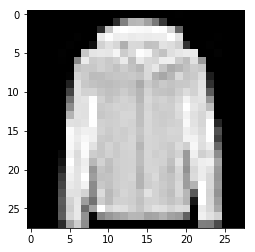

In [129]:
print('The first 10 labels are: '+str(Y_train[:10]))
plt.imshow(X_train[0,:].reshape(28,28),cmap='gray')

In [146]:
# Let's define the softmax probability calcuator

# this is the output from our matrix multiplication of weights and biases
y = np.r_[-7,24,17,-10,100,100]

# we need to add a row of 1s to our matrix because this allows us to unhinge the decision plane from 0
X_train2 = np.insert(X_train,0,1,axis=1)
X_test2 = np.insert(X_test,0,1,axis=1)

def softmax(y):
    # add axis = 1
    result = np.exp(y) / np.sum(np.exp(y),axis=1).reshape(-1,1)
    return result

print(np.round(softmax(y),4))

[0.  0.  0.  0.  0.5 0.5]


In [166]:
np.random.seed(123)
# create weight matrix
W = np.random.rand(785,10)
Y = softmax(X_train2 @ W) 
# we see that Y is a matrix that's number of samples long, number of categories wide
print(Y)
print(Y.shape)

# we can now decode these probabilities into likely categories
print(one_hot_decode(Y))
# these are the real values
print(Y_train)

# we can check the accuracy of our classifier
# this creates a boolean matrix, that we can then find proportion of Trues!
acc = np.mean(one_hot_decode(Y)==Y_train)
print("Accuracy = "+str(np.round(acc,3)))

[[3.94939667e-047 4.51969280e-048 3.38560511e-050 ... 6.62527272e-047
  5.44882685e-050 2.33264665e-045]
 [9.55107389e-093 4.86150432e-094 1.70833424e-095 ... 7.90854116e-092
  2.27663094e-093 7.86169035e-089]
 [4.94117154e-099 9.52898403e-101 6.75832520e-102 ... 9.43154222e-099
  3.42354357e-101 7.39986783e-096]
 ...
 [1.29928023e-076 2.96263025e-076 1.97230134e-080 ... 1.22581273e-075
  5.96863049e-078 8.69115861e-072]
 [7.49667205e-101 1.48869765e-101 1.18289264e-102 ... 4.03208165e-099
  3.50333123e-101 2.04188481e-096]
 [1.51015960e-114 8.53782920e-116 4.09163869e-116 ... 5.48636258e-113
  3.23354236e-115 1.39065518e-111]]
(55000, 10)
[9 9 9 ... 9 9 9]
[4 0 7 ... 3 0 5]
[False False False ... False False False]
Accuracy = 0.091


In [214]:
# cross-entropy is a way of seeing how close our predictions are from the real labels
# it's defined as taking the log of every prediction

Y_train2 = one_hot_encode3(Y_train,10)
Y_test2 = one_hot_encode3(Y_test,10)

def crossentropy(W, X_train2, Y_train2):
    Y_pred = softmax(X_train2 @ W)
    return -np.sum(Y_train2 * np.log(Y_pred)) / X_train2.shape[0]

In [195]:
def crossentropy_grad(W, X_train2, Y_train2):
    Y_pred = softmax(X_train2 @ W)
    return -(X_train2.T @ (Y_train2 - Y_pred) / X_train2.shape[0])

In [212]:
 def accuracy(W, X_train, Y_train):
    Y_pred = softmax(X_train @ W)
    return np.mean(one_hot_decode(Y_pred) == one_hot_decode(Y_train))

In [196]:
np.random.seed(123)
w = np.random.rand(785,10)
maxiter = 10
eta = 0.1 # I think this is learning rate?
for i in range(maxiter):
    w = w - eta*crossentropy_grad(W,X_train2,Y_train2)

In [215]:
# to do stochastic cross-entropy, we just choose a random row from our training dataset to do the calculation
# because we're doing this on a single number, we need to increase the number of iterations we're doing!
for i in range(maxiter):
    k = np.r_[np.random.choice(np.arange(X_train.shape[0]), 550)]
    W = W - eta*crossentropy_grad(W, X_train2[k,:], Y_train2[k,:])
    
    if i % 100 == 99:
        print("%3d: TRAIN: accuracy=%.3f cross_entropy=%6.2f  TEST:  accuracy=%.3f cross_entropy=%6.2f" %
          (i+1,
              accuracy(W, X_train2, Y_train2),
               crossentropy(W, X_train2, Y_train2),
               accuracy(W, X_test2, Y_test2),
               crossentropy(W, X_test2, Y_test2)
          ))

/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


100: TRAIN: accuracy=0.100 cross_entropy=   nan  TEST:  accuracy=0.100 cross_entropy=   nan
200: TRAIN: accuracy=0.101 cross_entropy=   nan  TEST:  accuracy=0.100 cross_entropy=   nan
300: TRAIN: accuracy=0.101 cross_entropy=   nan  TEST:  accuracy=0.100 cross_entropy=   nan


/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


400: TRAIN: accuracy=0.101 cross_entropy=   nan  TEST:  accuracy=0.100 cross_entropy=   nan
500: TRAIN: accuracy=0.101 cross_entropy=   nan  TEST:  accuracy=0.100 cross_entropy=   nan
600: TRAIN: accuracy=0.101 cross_entropy=   nan  TEST:  accuracy=0.100 cross_entropy=   nan
700: TRAIN: accuracy=0.101 cross_entropy=   nan  TEST:  accuracy=0.100 cross_entropy=   nan
800: TRAIN: accuracy=0.101 cross_entropy=   nan  TEST:  accuracy=0.100 cross_entropy=   nan
900: TRAIN: accuracy=0.101 cross_entropy=   nan  TEST:  accuracy=0.100 cross_entropy=   nan
1000: TRAIN: accuracy=0.101 cross_entropy=   nan  TEST:  accuracy=0.100 cross_entropy=   nan


# Tensorflow

In [208]:
# let's implement a neural network and our cross entropy in tensorflow
import tensorflow as tf

# this cell sets everything up for us 

# we do some variable declarations
w = tf.Variable(tf.random_normal((785,10)))

# we need a placeholder for our input data
x = tf.placeholder(tf.float32, [None,785]) # None means some number of rows, like -1 in our matrix indexing
y = tf.placeholder(tf.float32, [None,10]) 

# to do our predictions as before, we do a softmax of a matrix multiplication
# this is preparing our matrix of predictions
y_pred = tf.nn.softmax(tf.matmul(x,w)) # matmul is equivalent to @
print(y_pred) # we have shape (?,10) becausew e don't know how many rows we're going to input yet, given our None claus

# tensorflow is very sensitive to data types. So we need to ensure division is done by same data types
# so we cast our shape int to a float
cross_entropy = -tf.reduce_sum(y*tf.log(y_pred)) / tf.cast(tf.shape(x),tf.float32)[0]
print(cross_entropy)

# now we can computer the gradient of the cross-entropy function
eta = 0.1 # this is learning rate
cross_entropy_grad_step = tf.train.GradientDescentOptimizer(eta).minimize(cross_entropy)
cross_entropy_grad_step

Tensor("Softmax_4:0", shape=(?, 10), dtype=float32)
Tensor("truediv_3:0", shape=(), dtype=float32)


<tf.Operation 'GradientDescent_2' type=NoOp>

In [210]:
# this cell now initialises our calculations

np.random.seed(12345)
W = np.random.randn(785,10)
maxiter = 1000
eta  = 0.1

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(maxiter):
    k = np.r_[np.random.choice(np.arange(X_train.shape[0]), 550)]
    #W = W - eta*crossentropy_grad(W, X_train2[k,:], Y_train2[k,:])
    
    sess.run(cross_entropy_grad_step, feed_dict={
            x: X_train2[k,:],
            y: Y_train2[k,:]
    })
    
print("cross_entropy=%f" % sess.run(cross_entropy, feed_dict={
        x: X_train2, y: Y_train2
}))

cross_entropy=nan
